In [46]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf


data = pd.read_csv('/content/drive/MyDrive/survey.csv')

In [47]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [48]:
data.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [49]:
data = data.drop('comments', axis=1)

In [50]:
data['self_employed'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [51]:
data['self_employed'].mode()

0    No
dtype: object

In [52]:
data['self_employed'] = data['self_employed'].fillna('No')

In [53]:
data['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [54]:
data['work_interfere'].mode()

0    Sometimes
dtype: object

In [55]:
data['work_interfere'] = data['work_interfere'].fillna('Sometimes')

In [56]:
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,IL,No,No,Yes,Often,6-25,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,M,United States,IN,No,No,No,Rarely,More than 1000,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,Male,Canada,NaN,No,No,No,Rarely,6-25,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,Male,United States,TX,No,No,No,Never,100-500,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,Sometimes,100-500,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [57]:
data['Timestamp']

0       2014-08-27 11:29:31
1       2014-08-27 11:29:37
2       2014-08-27 11:29:44
3       2014-08-27 11:29:46
4       2014-08-27 11:30:22
               ...         
1254    2015-09-12 11:17:21
1255    2015-09-26 01:07:35
1256    2015-11-07 12:36:58
1257    2015-11-30 21:25:06
1258    2016-02-01 23:04:31
Name: Timestamp, Length: 1259, dtype: object

In [58]:
data['Year'] = data['Timestamp'].apply(lambda x: np.int(x[0:4]))
data['Month'] = data['Timestamp'].apply(lambda x: np.int(x[5:7]))
data['Day'] = data['Timestamp'].apply(lambda x: np.int(x[8:10]))

data['Hour'] = data['Timestamp'].apply(lambda x: np.int(x[11:13]))
data['Minute'] = data['Timestamp'].apply(lambda x: np.int(x[14:16]))
data['Second'] = data['Timestamp'].apply(lambda x: np.int(x[17:19]))

data = data.drop('Timestamp', axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the releas

In [59]:
data


,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Year,Month,Day,Hour,Minute,Second
0,37,Female,United States,IL,No,No,Yes,Often,6-25,No,...,No,Maybe,Yes,No,2014,8,27,11,29,31
1,44,M,United States,IN,No,No,No,Rarely,More than 1000,No,...,No,No,Don't know,No,2014,8,27,11,29,37
2,32,Male,Canada,NaN,No,No,No,Rarely,6-25,No,...,Yes,Yes,No,No,2014,8,27,11,29,44
3,31,Male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,No,...,Maybe,Maybe,No,Yes,2014,8,27,11,29,46
4,31,Male,United States,TX,No,No,No,Never,100-500,Yes,...,Yes,Yes,Don't know,No,2014,8,27,11,30,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,No,...,No,No,Don't know,No,2015,9,12,11,17,21
1255,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,...,No,No,Yes,No,2015,9,26,1,7,35
1256,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,...,No,No,No,No,2015,11,7,12,36,58
1257,46,f,United States,NC,No,No,No,Sometimes,100-500,Yes,...,No,No,No,No,2015,11,30,21,25,6


In [60]:
{column: len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Gender': 49,
 'Country': 48,
 'state': 46,
 'self_employed': 2,
 'family_history': 2,
 'treatment': 2,
 'work_interfere': 4,
 'no_employees': 6,
 'remote_work': 2,
 'tech_company': 2,
 'benefits': 3,
 'care_options': 3,
 'wellness_program': 3,
 'seek_help': 3,
 'anonymity': 3,
 'leave': 5,
 'mental_health_consequence': 3,
 'phys_health_consequence': 3,
 'coworkers': 3,
 'supervisor': 3,
 'mental_health_interview': 3,
 'phys_health_interview': 3,
 'mental_vs_physical': 3,
 'obs_consequence': 2}

In [61]:
{column: list(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Gender': ['Female',
  'M',
  'Male',
  'male',
  'female',
  'm',
  'Male-ish',
  'maile',
  'Trans-female',
  'Cis Female',
  'F',
  'something kinda male?',
  'Cis Male',
  'Woman',
  'f',
  'Mal',
  'Male (CIS)',
  'queer/she/they',
  'non-binary',
  'Femake',
  'woman',
  'Make',
  'Nah',
  'All',
  'Enby',
  'fluid',
  'Genderqueer',
  'Female ',
  'Androgyne',
  'Agender',
  'cis-female/femme',
  'Guy (-ish) ^_^',
  'male leaning androgynous',
  'Male ',
  'Man',
  'Trans woman',
  'msle',
  'Neuter',
  'Female (trans)',
  'queer',
  'Female (cis)',
  'Mail',
  'cis male',
  'A little about you',
  'Malr',
  'p',
  'femail',
  'Cis Man',
  'ostensibly male, unsure what that really means'],
 'Country': ['United States',
  'Canada',
  'United Kingdom',
  'Bulgaria',
  'France',
  'Portugal',
  'Netherlands',
  'Switzerland',
  'Poland',
  'Australia',
  'Germany',
  'Russia',
  'Mexico',
  'Brazil',
  'Slovenia',
  'Costa Rica',
  'Austria',
  'Ireland',
  'India',
  'South Afric

In [62]:
def encode_gender(x):
    if x.lower()[0] == 'f':
        return 0
    elif x.lower()[0] == 'm':
        return 1
    else:
        return 2

In [63]:
data['Gender'] = data['Gender'].apply(encode_gender)

In [64]:
target = 'treatment'

binary_features = [
    'self_employed',
    'family_history',
    'remote_work',
    'tech_company',
    'obs_consequence'
]

ordinal_features = [
    'work_interfere',
    'no_employees'
]
nominal_features = [
    'Country',
    'state',
    'benefits',
    'care_options',
    'wellness_program',
    'seek_help',
    'anonymity',
    'leave',
    'mental_health_consequence',
    'phys_health_consequence',
    'coworkers',
    'supervisor',
    'mental_health_interview',
    'phys_health_interview',
    'mental_vs_physical'
]

In [65]:
def binary_encode(df, columns, positive_values):
    df = df.copy()
    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def ordinal_encode(df, columns, orderings):
    df = df.copy()
    for column, ordering in zip(columns, orderings):
        df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [66]:
binary_positive_values = ['Yes' for feature in binary_features]

ordinal_orderings = [
    ['Never', 'Rarely', 'Sometimes', 'Often'],
    ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
]

nominal_prefixes = [
    'co',
    'st',
    're',
    'be',
    'ca',
    'we',
    'se',
    'an',
    'le',
    'mc',
    'ph',
    'cw',
    'su',
    'mi',
    'pi',
    'mp'
]


In [67]:

data = binary_encode(
    data,
    columns=binary_features,
    positive_values=binary_positive_values
)

data = ordinal_encode(
    data,
    columns=ordinal_features,
    orderings=ordinal_orderings
)

data = onehot_encode(
    data,
    columns=nominal_features,
    prefixes=nominal_prefixes
)

In [68]:
data

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,obs_consequence,...,cw_Yes,su_Maybe,su_No,su_Yes,mi_Maybe,mi_No,mi_Yes,pi_Don't know,pi_No,pi_Yes
0,37,0,0,0,Yes,3,1,0,1,0,...,1,0,1,0,1,0,0,0,0,1
1,44,1,0,0,No,1,5,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,32,1,0,0,No,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
3,31,1,0,1,Yes,3,2,0,1,1,...,0,1,0,0,1,0,0,0,1,0
4,31,1,0,0,No,0,3,1,1,0,...,1,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,1,0,0,Yes,2,2,0,1,0,...,0,0,1,0,0,1,0,1,0,0
1255,32,1,0,1,Yes,3,2,1,1,0,...,1,0,1,0,0,1,0,0,0,1
1256,34,1,0,1,Yes,2,5,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1257,46,0,0,0,No,2,3,1,1,0,...,0,0,1,0,0,1,0,0,1,0


In [69]:
data = binary_encode(data, columns=['treatment'], positive_values=['Yes'])

In [70]:
print("Remaining non-numeric columns:", len(data.select_dtypes('object').columns))

Remaining non-numeric columns: 0


In [71]:
print("Remaining missing values:", data.isna().sum().sum())

Remaining missing values: 0


In [72]:
y = data['treatment'].copy()
X = data.drop('treatment', axis=1).copy()

In [73]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [75]:
X.shape

(1259, 149)

In [76]:
print("Class Distribution (Positive to Negative): {:.1f}% / {:.1f}%".format(y_train.mean() * 100, (1 - y_train.mean()) * 100))

Class Distribution (Positive to Negative): 49.7% / 50.3%


In [77]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(1024, activation='relu')(inputs)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)


batch_size = 64
epochs = 50

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/50
11/11 [==============================] - 2s 56ms/step - loss: 0.7035 - accuracy: 0.6420 - auc: 0.6583 - val_loss: 0.6960 - val_accuracy: 0.6158 - val_auc: 0.6878 - lr: 0.0010
Epoch 2/50
11/11 [==============================] - 0s 25ms/step - loss: 0.4347 - accuracy: 0.7884 - auc: 0.8829 - val_loss: 0.7196 - val_accuracy: 0.6497 - val_auc: 0.6956 - lr: 0.0010
Epoch 3/50
11/11 [==============================] - 0s 26ms/step - loss: 0.3340 - accuracy: 0.8523 - auc: 0.9333 - val_loss: 0.8496 - val_accuracy: 0.5989 - val_auc: 0.6948 - lr: 0.0010
Epoch 4/50
11/11 [==============================] - 0s 25ms/step - loss: 0.2449 - accuracy: 0.9006 - auc: 0.9695 - val_loss: 0.9565 - val_accuracy: 0.6441 - val_auc: 0.6748 - lr: 0.0010
Epoch 5/50
11/11 [==============================] - 0s 25ms/step - loss: 0.1842 - accuracy: 0.9403 - auc: 0.9872 - val_loss: 1.0762 - val_accuracy: 0.6554 - val_auc: 0.6756 - lr: 0.0010
Epoch 6/50
11/11 [==============================] - 0s 26ms/step - los

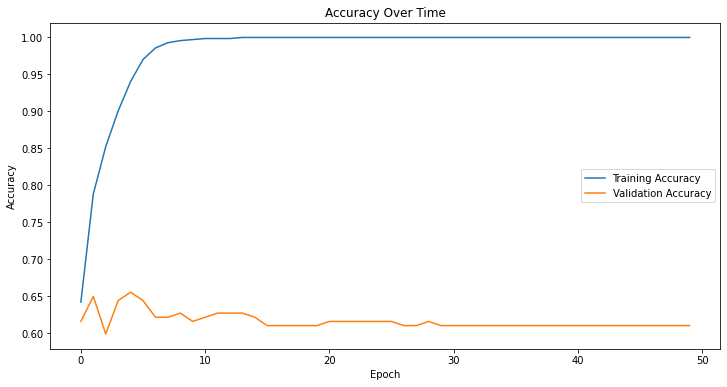

In [78]:
plt.figure(figsize=(12, 6))

plt.plot(range(epochs), history.history['accuracy'], label="Training Accuracy")
plt.plot(range(epochs), history.history['val_accuracy'], label="Validation Accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title("Accuracy Over Time")

plt.show()

In [79]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 5ms/step - loss: 1.7168 - accuracy: 0.6852 - auc: 0.7144


[1.716781735420227, 0.6851851940155029, 0.7144100069999695]